# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics** (see below) for the region of **Parma, Province of Parma, Italy**, or **Italy** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Parma, Province of Parma, Italy** to Ann Arbor, USA. In that case at least one source file must be about **Parma, Province of Parma, Italy**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Parma, Province of Parma, Italy** and **sports or athletics**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **sports or athletics**?  For this category we are interested in sporting events or athletics broadly, please feel free to creatively interpret the category when building your research question!

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

## Questions

On this study, I want to answer two questions:

- **Which soccer competition is the most contested? Serie A (Italy), La Liga (Spain), or Premier League (England)**

- **In which competition is there more difference between big and small teams?**

To do that, I have analyzed the results of the last **21 seasons**, i.e. from season 2000-2001 to 2020-2021.

## Links

All data used here was collected from the following websites:

- Serie A (Italy): https://fbref.com/en/comp/11/Statistiche-di-Serie-A
- La Liga (Spain): https://fbref.com/en/comp/12/Statistiche-di-La-Liga
- Premier League (England): https://fbref.com/en/comps/9/Premier-League-Stats

and other sources:
- https://fcstats.com/
- https://www.futbolred.com/

## Conclusions

According to the results of this study, we could conclude that Premier League is the most interesting competition. I achieved this conclusion for two reasons:

In the last 21 years, 7 different teams won the Premier League giving some uncertainty at the beginning of the season. On the contrary, only 4 teams won the Serie A and the “La Liga”. In addition, in the case of Italy, the same Juventus won 13 titles, i.e., more than 60% of the seasons. This fact makes the final result of each season very predictable.

One of the reasons of this low variability of the winner of the Italian and Spanish competition could be explaining by the difference between the big and the small teams. Comparing the point difference between the 4 first teams and the last 4 teams, we can see that this difference is growing year-by-year. This fact makes it less likely that one small team could win these competitions. In the case of England, this difference is more stable along the last 21 years, but it is also increasing.

### Disclaimer
I am using the “Score coefficient (SC)” instead of the absolute score value because before of season 2004-2004, the Italian competition only had 18 teams instead of 20, so the total score is different.

In [1]:
%matplotlib notebook

import matplotlib as mpl
mpl.get_backend()
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import pandas as pd

### Functions definition

In [7]:
# Function for reading the input data from Excel files
def read_data(path):
    # Lists
    season_list = []
    cl_score = []
    cl_max = []
    cl_min = []
    el_score = []
    el_max = []
    el_min = []
    last_score = []
    last4_score = []
    winners = []

    for season in sheet_list:
        df_aux = pd.read_excel(file_path, sheet_name=season)

        # Season
        season_list.append(season)

        max_score = df_aux["PJ"][0] * 3
        # Calculation of the average point to get the Champions league classification
        score = 0
        for i in range(4):
            score = score + df_aux["Pts"][i] / max_score

        score = score / 4

        cl_score.append(score)
    
        # Score of first & last possition for Champions league
        cl_max.append(df_aux["Pts"][0] / max_score)
        cl_min.append(df_aux["Pts"][3] / max_score)

        # Calculation of the average point to get the Europa league classification
        score = 0
        for i in range(4, 6):
            score = score + df_aux["Pts"][i] / max_score

        score = score / 2

        el_score.append(score)
    
        # Score of first & last possition for Europa league
        el_max.append(df_aux["Pts"][4] / max_score)
        el_min.append(df_aux["Pts"][5] / max_score)
    
        # Score of the last team
        last_score.append(df_aux["Pts"][len(df_aux["Pts"]) - 1] / max_score)
    
        # Average score of the last 4 teams
        score = 0
        for i in range(1, 5):
            score = score + df_aux["Pts"][len(df_aux["Pts"]) - i] / max_score

        score = score / 4

        last4_score.append(score)
    
        # Winners
        winners.append(df_aux["Equipo"][0])

    # Creation the dataframe of Italy
    df_output = pd.DataFrame()
    df_output["Season"] = season_list
    df_output["CL_score"] = cl_score
    df_output["CL_max"] = cl_max
    df_output["CL_min"] = cl_min
    df_output["EL_score"] = el_score
    df_output["EL_max"] = el_max
    df_output["EL_min"] = el_min
    df_output["Last_score"] = last_score
    df_output["Last4_score"] = last4_score
    df_output["Winners"] = winners
    
    df_output = df_output.assign(Coef=1)
    
    return df_output

In [ ]:
# Function for autopct of the Pie plots
def win_labels(value):
    output = int(21 * value / 100)
    return str(output)

### Main code

In [2]:
# Names list of the excel sheet of the input data files
sheet_list = []

for i in range(21):
    item = str(2000 + i) + "-" + str(2001 + i)
    sheet_list.append(item)

In [14]:
# Load the data from the "Seria A-Italy"
df_italy = read_data("Italy.xlsx")

df_italy.head()

,Season,CL_score,CL_max,CL_min,EL_score,EL_max,EL_min,Last_score,Last4_score,Winners,Coef
0,2000-2001,0.629386,0.701754,0.596491,0.557018,0.578947,0.535088,0.228070,0.298246,Manchester Utd,1
1,2001-2002,0.690789,0.763158,0.622807,0.570175,0.578947,0.561404,0.245614,0.293860,Arsenal,1
2,2002-2003,0.651316,0.728070,0.587719,0.543860,0.561404,0.526316,0.166667,0.287281,Manchester Utd,1
3,2003-2004,0.666667,0.789474,0.526316,0.491228,0.491228,0.491228,0.289474,0.302632,Arsenal,1
4,2004-2005,0.692982,0.833333,0.535088,0.508772,0.508772,0.508772,0.280702,0.289474,Chelsea,1


In [15]:
# Load the data from the "La Liga-Spain"
df_spain = read_data("Spain.xlsx")

df_spain.head()

,Season,CL_score,CL_max,CL_min,EL_score,EL_max,EL_min,Last_score,Last4_score,Winners,Coef
0,2000-2001,0.629386,0.701754,0.596491,0.557018,0.578947,0.535088,0.228070,0.298246,Manchester Utd,1
1,2001-2002,0.690789,0.763158,0.622807,0.570175,0.578947,0.561404,0.245614,0.293860,Arsenal,1
2,2002-2003,0.651316,0.728070,0.587719,0.543860,0.561404,0.526316,0.166667,0.287281,Manchester Utd,1
3,2003-2004,0.666667,0.789474,0.526316,0.491228,0.491228,0.491228,0.289474,0.302632,Arsenal,1
4,2004-2005,0.692982,0.833333,0.535088,0.508772,0.508772,0.508772,0.280702,0.289474,Chelsea,1


In [16]:
# Load the data from the "Premier League-England"
df_england = read_data("England.xlsx")

df_england.head()

,Season,CL_score,CL_max,CL_min,EL_score,EL_max,EL_min,Last_score,Last4_score,Winners,Coef
0,2000-2001,0.629386,0.701754,0.596491,0.557018,0.578947,0.535088,0.228070,0.298246,Manchester Utd,1
1,2001-2002,0.690789,0.763158,0.622807,0.570175,0.578947,0.561404,0.245614,0.293860,Arsenal,1
2,2002-2003,0.651316,0.728070,0.587719,0.543860,0.561404,0.526316,0.166667,0.287281,Manchester Utd,1
3,2003-2004,0.666667,0.789474,0.526316,0.491228,0.491228,0.491228,0.289474,0.302632,Arsenal,1
4,2004-2005,0.692982,0.833333,0.535088,0.508772,0.508772,0.508772,0.280702,0.289474,Chelsea,1


<IPython.core.display.Javascript object>


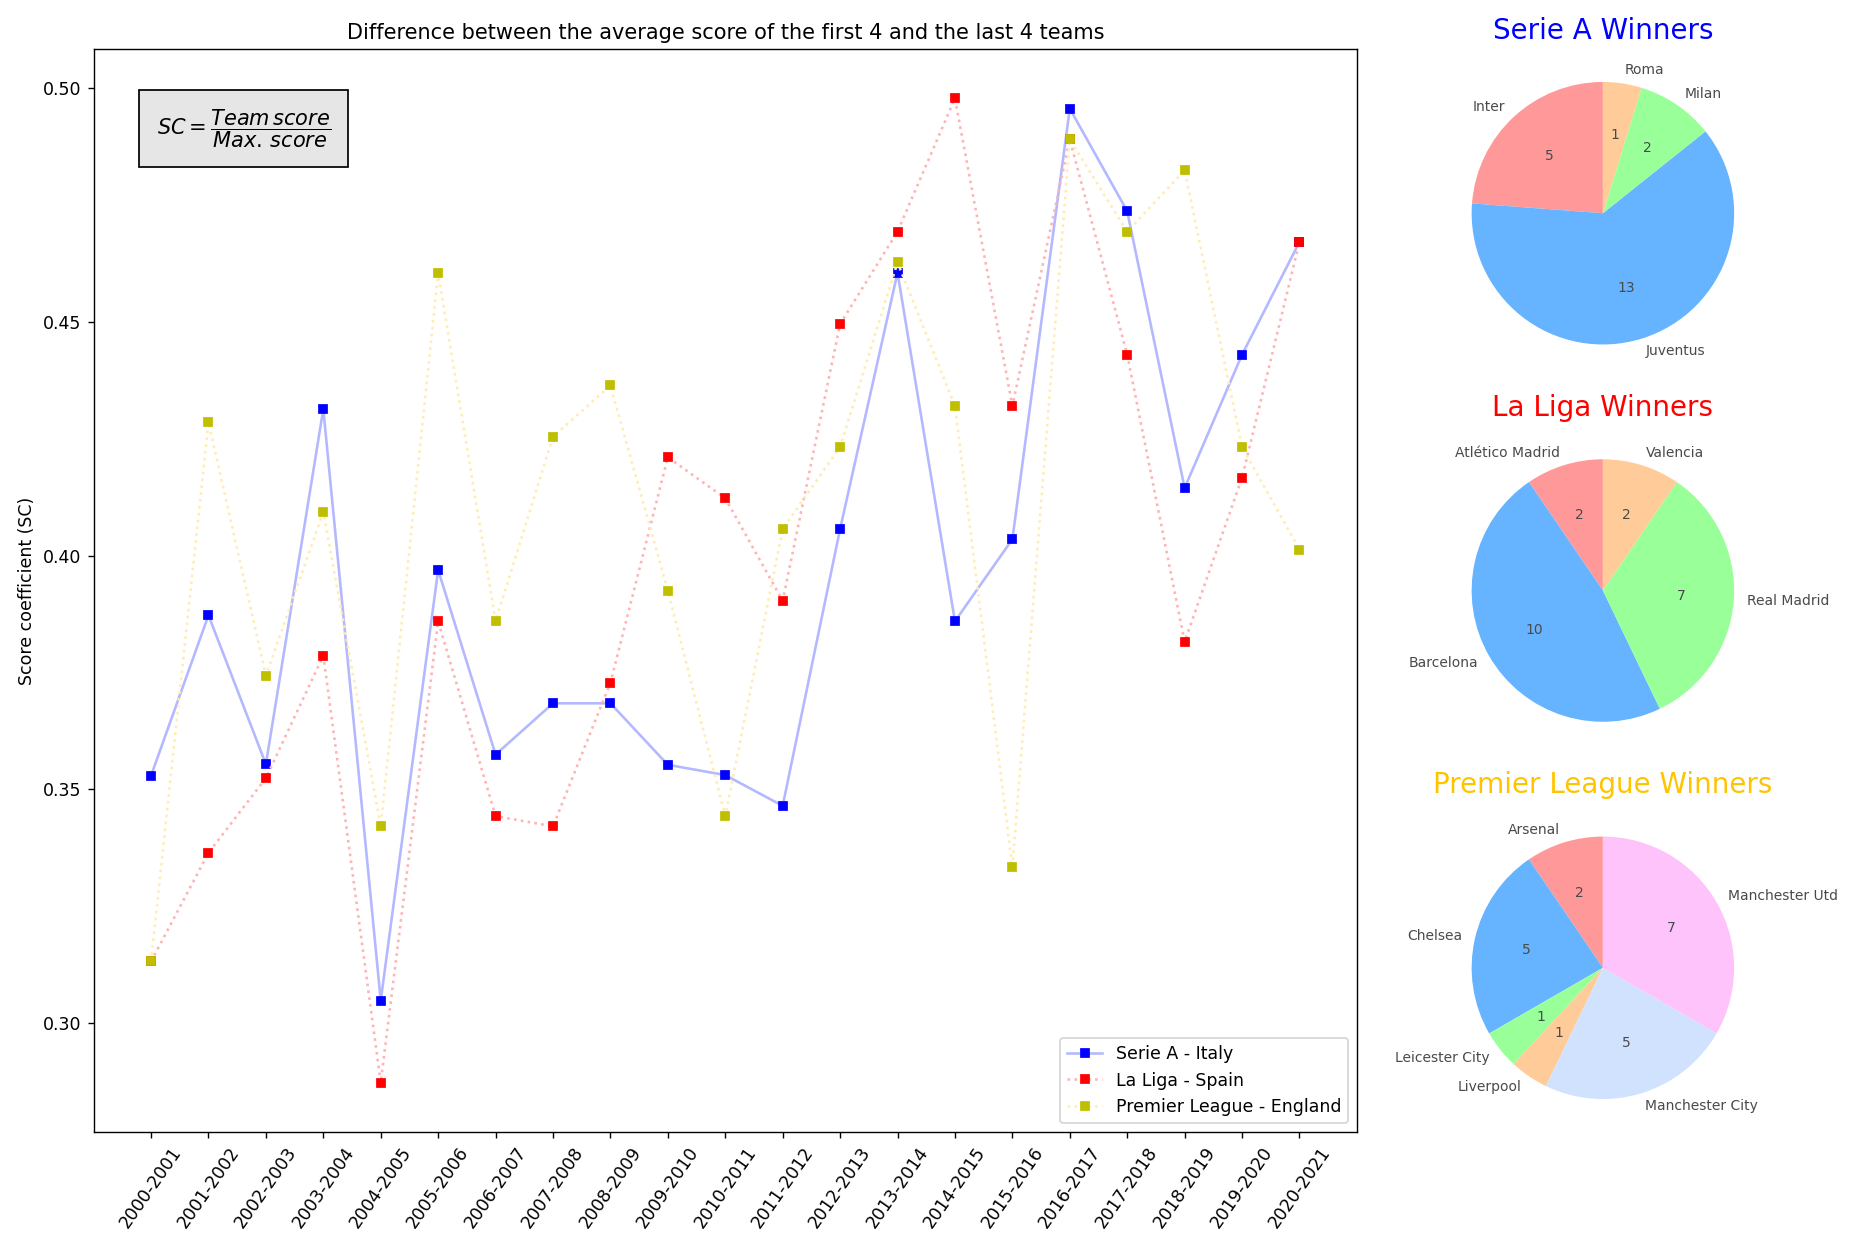

In [12]:
plt.figure(figsize=(15,10))
gspec = gridspec.GridSpec(3,4)
ln = plt.subplot(gspec[:, 0:3])
pt = plt.subplot(gspec[0, 3])
pm = plt.subplot(gspec[1, 3])
pb = plt.subplot(gspec[2, 3])

# Line plot
ln.plot(df_italy["CL_score"] - df_italy["Last4_score"], color="#B3B8FF", linestyle='-', label="Serie A - Italy",
         marker='s', markerfacecolor='b', markeredgecolor='b', markersize=5)
ln.plot(df_spain["CL_score"] - df_italy["Last4_score"], color="#FFB3B3", linestyle=':', label="La Liga - Spain",
         marker='s', markerfacecolor='r', markeredgecolor='r', markersize=5)
ln.plot(df_england["CL_score"] - df_italy["Last4_score"], color="#FFECB3", linestyle=':', label="Premier League - England",
         marker='s', markerfacecolor='y', markeredgecolor='y', markersize=5)

ln.text(0.1, 0.49, "$SC=\dfrac{Team\,score}{Max.\,score}$", fontsize=12, bbox ={'facecolor':'#E6E6E6', 'pad':10})

ln.set_xticks(range(21))
ln.set_xticklabels(sheet_list, rotation=55)

ln.set_title("Difference between the average score of the first 4 and the last 4 teams");
ln.set_ylabel("Score coefficient (SC)")
ln.legend(loc=4)

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#d1e2ff', '#ffc3fc']
# Top pie plot (Serie A - Italy)
df_italy.groupby('Winners').sum().plot.pie(ax=pt, y="Coef", startangle=90, colors=colors, legend=False, 
                                           autopct=win_labels, textprops={'fontsize': 8, 'color': '#4A4A4A'})
pt.set_title("Serie A Winners", color='blue', fontsize=16)
pt.set_ylabel(None)

# Middle pie plot (La Liga - Spain)
df_spain.groupby('Winners').sum().plot.pie(ax=pm, y="Coef", startangle=90, colors=colors, legend=False, 
                                           autopct=win_labels, textprops={'fontsize': 8, 'color': '#4A4A4A'})
pm.set_title("La Liga Winners", color='red', fontsize=16)
pm.set_ylabel(None)

# Bottom pie plot (Premier League - England)
df_england.groupby('Winners').sum().plot.pie(ax=pb, y="Coef", startangle=90, colors=colors, legend=False, 
                                             autopct=win_labels, textprops={'fontsize': 8, 'color': '#4A4A4A'})
pb.set_title("Premier League Winners", color='#FFC400', fontsize=16)
pb.set_ylabel(None)

plt.tight_layout()

In [13]:
# Save figure as PNG file
plt.savefig('Assignment4.png', dpi=300)